Создаем полносвязную сеть в Keras для распознавания рукописных цифр из базы MNIST. Рассматриваются вопросы подготовки тестовой, обучающей и проверочной выборок. Критерий качества (loss function) - категориальная кросс-энтропия (categorical_crossentropy). Добавление метрики 'accuracy' - доля правильно распознанных образцов. Использование параметра validation_split - для выделения из обучающей выборки набора наблюдений для валидации. Оценка качества работы обученной сети на тестовом множестве.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# стандартизация входных данных, так чтобы значения были вещественные от 0 до 1
x_train = x_train / 255
x_test = x_test / 255

In [3]:
# преобразование выходных значений в векторы по категориям, где, например, значение 2 становится [0,0,1,0,0,0,0,0,0,0]
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

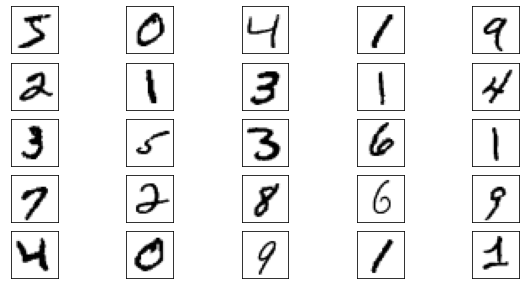

In [4]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [5]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), #входной слой с размерами изображений, 1 - один пиксель тк градация цвета серая
    Dense(128, activation='relu'), #связи к скрытым слоям, число нейронов на скрытом слое и функция активации
    Dense(10, activation='softmax') #количество выходных значений и функция активации
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#Компиляция НС с оптимизацией Adam и критерием категориальная кросс-энтропия
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
#запуск модели обучения, где 80% обучающая выборка и 20% - выборка валидации
#batch_size - после скольки изображений будут коректироваться веса
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0853 - val_accuracy: 0.9765
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0301 - accuracy: 0.9912 - val_loss: 0.0944 - val_accuracy: 0.9731
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0248 - accuracy: 0.9925 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0915 - val_accuracy: 0.9759
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.0896 - val_accuracy: 0.9771


In [9]:
#проверка распознавания цифр
model.evaluate(x_test, y_test_cat)
#loss - критерий качества
#accuracy - правильно распознанные

313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9785


[0.07872369140386581, 0.9785000085830688]

1/1 [==============================] - 0s 32ms/step
[[2.4419322e-08 2.7599324e-06 9.9999619e-01 1.4252550e-08 2.6519415e-23
  1.9720771e-10 5.2649973e-09 7.7749426e-17 1.1119436e-06 7.5153084e-13]]
Распознанная цифра: 2


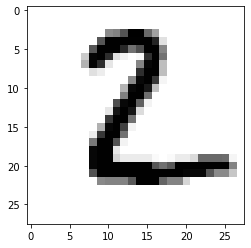

In [13]:
n = 1
x = np.expand_dims(x_test[n], axis=0) # создание трехмерного тензора
res = model.predict(x)
print( res )
print( 'Распознанная цифра:', np.argmax(res) )#.argmax берем индекс максимального значения среди выходов
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [14]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test) #проводим всю тестовую выборку
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [15]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)
#215 изображений распознано неверно

[ True  True  True  True  True  True  True  True  True  True]
(215, 28, 28)


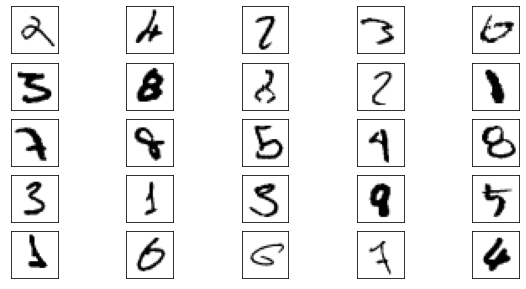

In [17]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()
